### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/leonel-robles/BD_Tiendas/refs/heads/main/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/leonel-robles/BD_Tiendas/refs/heads/main/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/leonel-robles/BD_Tiendas/refs/heads/main/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/leonel-robles/BD_Tiendas/refs/heads/main/tienda_4.csv"

#Leyendo datos de un archivo CSV y cargandolos en variables (DataFrames)
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)


#1. Análisis de facturación



In [2]:
# Ingreso total de cada tienda.

# Total de ingresos de cada tienda
total_in_tienda1 = tienda1['Precio'].sum()
total_in_tienda2 = tienda2['Precio'].sum()
total_in_tienda3 = tienda3['Precio'].sum()
total_in_tienda4 = tienda4['Precio'].sum()

print(f"Ingreso total Tienda 1: {total_in_tienda1}")
print(f"Ingreso total Tienda 2: {total_in_tienda2}")
print(f"Ingreso total Tienda 3: {total_in_tienda3}")
print(f"Ingreso total Tienda 4: {total_in_tienda4}")

Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


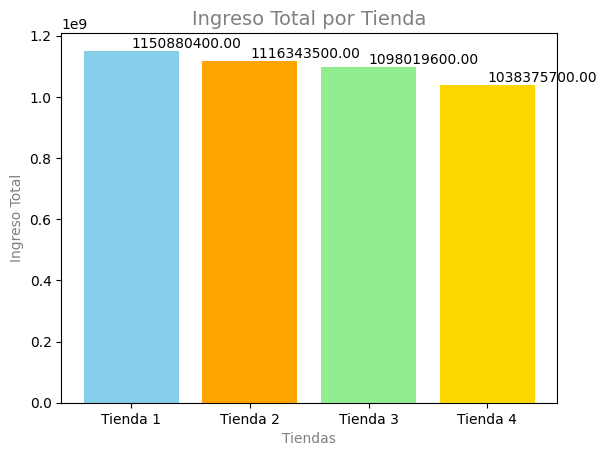

In [5]:
import matplotlib.pyplot as plt

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
y = [total_in_tienda1, total_in_tienda2, total_in_tienda3, total_in_tienda4]
colores = ['skyblue', 'orange', 'lightgreen', 'gold']

plt.bar(tiendas, y, color= colores)
plt.title('Ingreso Total por Tienda', fontsize=14, color='grey')
plt.xlabel('Tiendas', color='grey')
plt.ylabel('Ingreso Total', color='grey')

# Etiquetas a los puntos de intersección
for i, txt in enumerate(y):
    plt.text(tiendas[i], y[i], f'{txt:.2f}', ha='left', va='bottom')
plt.show()

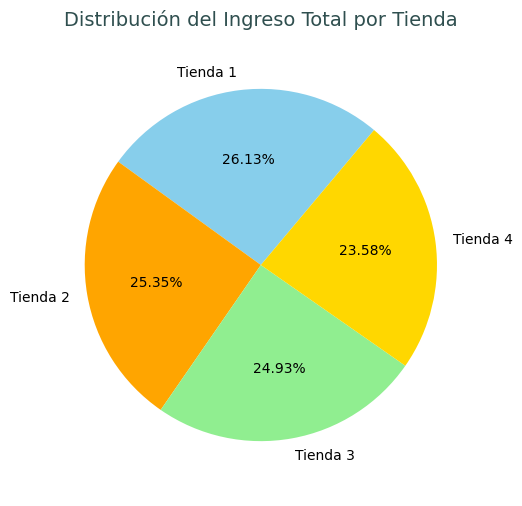

In [6]:
plt.figure(figsize=(5, 6)) # Ajusta el tamaño de la figura para mejor visualización
plt.pie(y, labels=tiendas, autopct='%1.2f%%', startangle=50, colors=colores)

plt.title('Distribución del Ingreso Total por Tienda', fontsize=14, color='darkslategray')
plt.axis('equal')  # Asegura que el gráfico de pastel sea un círculo.
plt.show()

La tienda 1 es la que más ingresos genera alcanzando un total de 1,150,880,400 representando un 26.13% sobre el ingreso total.
La tienda 4 solo alcanza un total de 1,038,375,700 representando un 23.58% del total. La diferencia que existe entre ellas es de 112,504,700

# 2. Ventas por categoría

In [7]:
# prompt: calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

# Group data by category and count the number of sales for each type,
# showing the most popular categories in each store.

ventas_categoria_tienda1 = tienda1.groupby('Categoría del Producto').size().reset_index(name='Cantidad_Vendida')
ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().reset_index(name='Cantidad_Vendida')
ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().reset_index(name='Cantidad_Vendida')
ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().reset_index(name='Cantidad_Vendida')


print("Ventas por Categoria - Tienda 1:")
print(ventas_categoria_tienda1.sort_values(by='Categoría del Producto'))
print("\nVentas por Categoria - Tienda 2:")
print(ventas_categoria_tienda2.sort_values(by='Categoría del Producto', ascending=False))
print("\nVentas por Categoria - Tienda 3:")
print(ventas_categoria_tienda3.sort_values(by='Cantidad_Vendida'))
print("\nVentas por Categoria - Tienda 4:")
print(ventas_categoria_tienda4.sort_values(by='Cantidad_Vendida', ascending=False))

Ventas por Categoria - Tienda 1:
    Categoría del Producto  Cantidad_Vendida
0  Artículos para el hogar               171
1     Deportes y diversión               284
2        Electrodomésticos               312
3             Electrónicos               448
4   Instrumentos musicales               182
5                 Juguetes               324
6                   Libros               173
7                  Muebles               465

Ventas por Categoria - Tienda 2:
    Categoría del Producto  Cantidad_Vendida
7                  Muebles               442
6                   Libros               197
5                 Juguetes               313
4   Instrumentos musicales               224
3             Electrónicos               422
2        Electrodomésticos               305
1     Deportes y diversión               275
0  Artículos para el hogar               181

Ventas por Categoria - Tienda 3:
    Categoría del Producto  Cantidad_Vendida
0  Artículos para el hogar               177

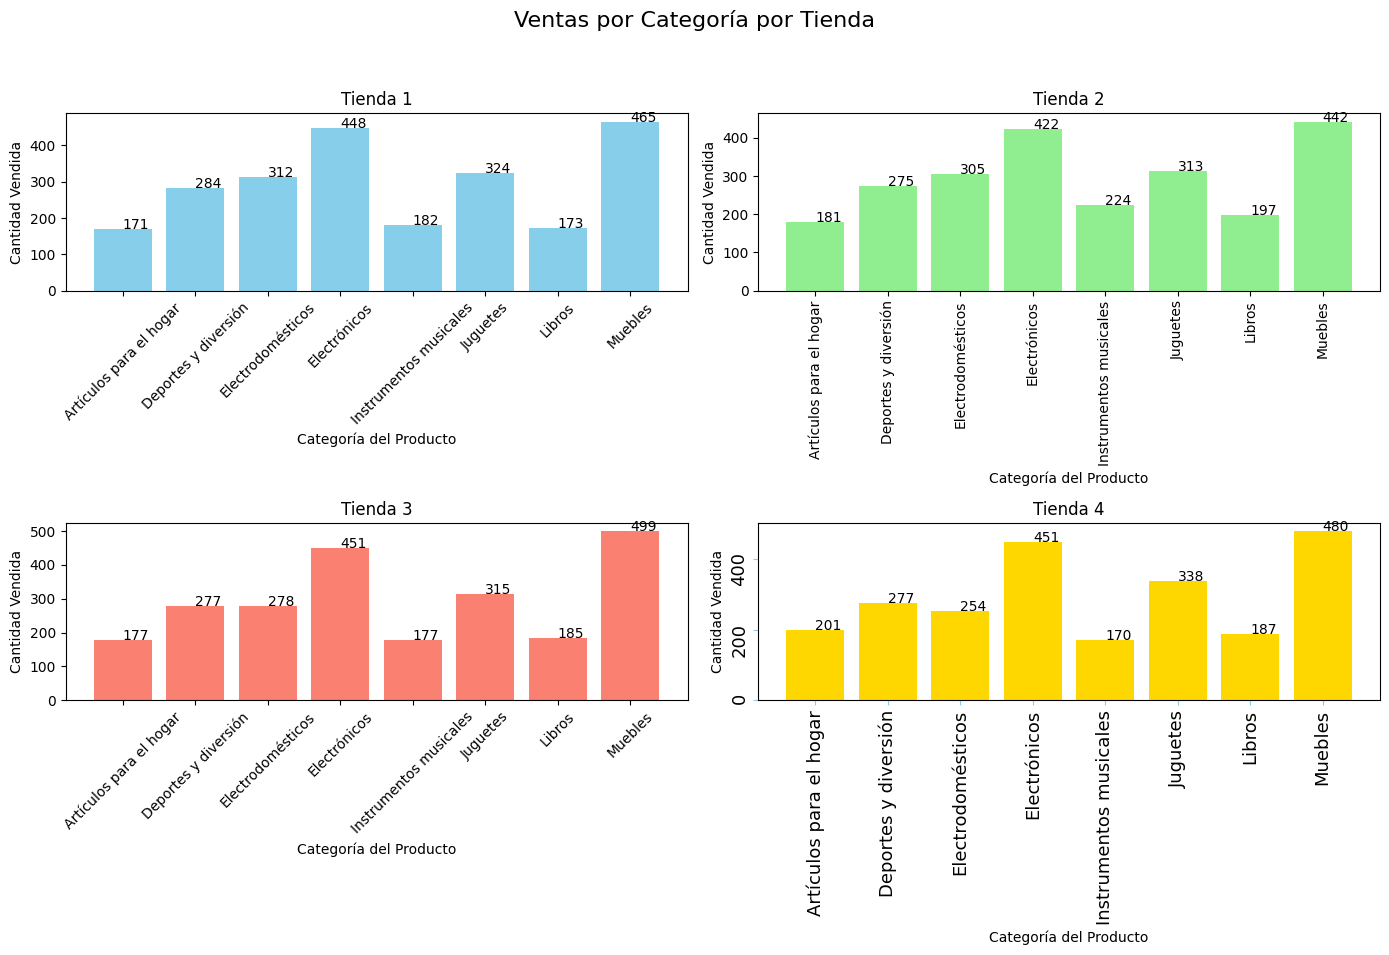

In [8]:
# Crear un subgráfico para cada tienda
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Ventas por Categoría por Tienda', fontsize=16)

# Grafico para Tienda 1
axes[0, 0].bar(ventas_categoria_tienda1['Categoría del Producto'],
               ventas_categoria_tienda1['Cantidad_Vendida'], color='skyblue')
axes[0, 0].set_title('Tienda 1')
axes[0, 0].set_xlabel('Categoría del Producto')
axes[0, 0].set_ylabel('Cantidad Vendida')
axes[0, 0].tick_params(axis='x', rotation=45)

for i, txt in enumerate(ventas_categoria_tienda1['Cantidad_Vendida']):
  axes[0,0].text(ventas_categoria_tienda1['Categoría del Producto'][i],
                 txt, txt)

# Grafico para Tienda 2
axes[0, 1].bar(ventas_categoria_tienda2['Categoría del Producto'],
               ventas_categoria_tienda2['Cantidad_Vendida'], color='lightgreen')
axes[0, 1].set_title('Tienda 2')
axes[0, 1].set_xlabel('Categoría del Producto')
axes[0, 1].set_ylabel('Cantidad Vendida')
axes[0, 1].tick_params(axis='x', rotation=90)
for i, txt in enumerate(ventas_categoria_tienda2['Cantidad_Vendida']):
  axes[0,1].text(ventas_categoria_tienda2['Categoría del Producto'][i],
                 txt, txt)

# Grafico para Tienda 3
axes[1, 0].bar(ventas_categoria_tienda3['Categoría del Producto'],
               ventas_categoria_tienda3['Cantidad_Vendida'], color='salmon')
axes[1, 0].set_title('Tienda 3')
axes[1, 0].set_xlabel('Categoría del Producto')
axes[1, 0].set_ylabel('Cantidad Vendida')
axes[1, 0].tick_params(axis='x', rotation=45)
for i, txt in enumerate(ventas_categoria_tienda3['Cantidad_Vendida']):
  axes[1,0].text(ventas_categoria_tienda3['Categoría del Producto'][i],
                 txt, txt)

# Grafico para Tienda 4
axes[1, 1].bar(ventas_categoria_tienda4['Categoría del Producto'],
               ventas_categoria_tienda4['Cantidad_Vendida'], color='gold')
axes[1, 1].set_title('Tienda 4')
axes[1, 1].set_xlabel('Categoría del Producto')
axes[1, 1].set_ylabel('Cantidad Vendida')
axes[1, 1].tick_params(axis='both', rotation=90, color='skyblue', labelsize=13)
for i, txt in enumerate(ventas_categoria_tienda4['Cantidad_Vendida']):
  axes[1,1].text(ventas_categoria_tienda4['Categoría del Producto'][i],
                 txt, txt)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar el layout para evitar solapamiento
plt.show()

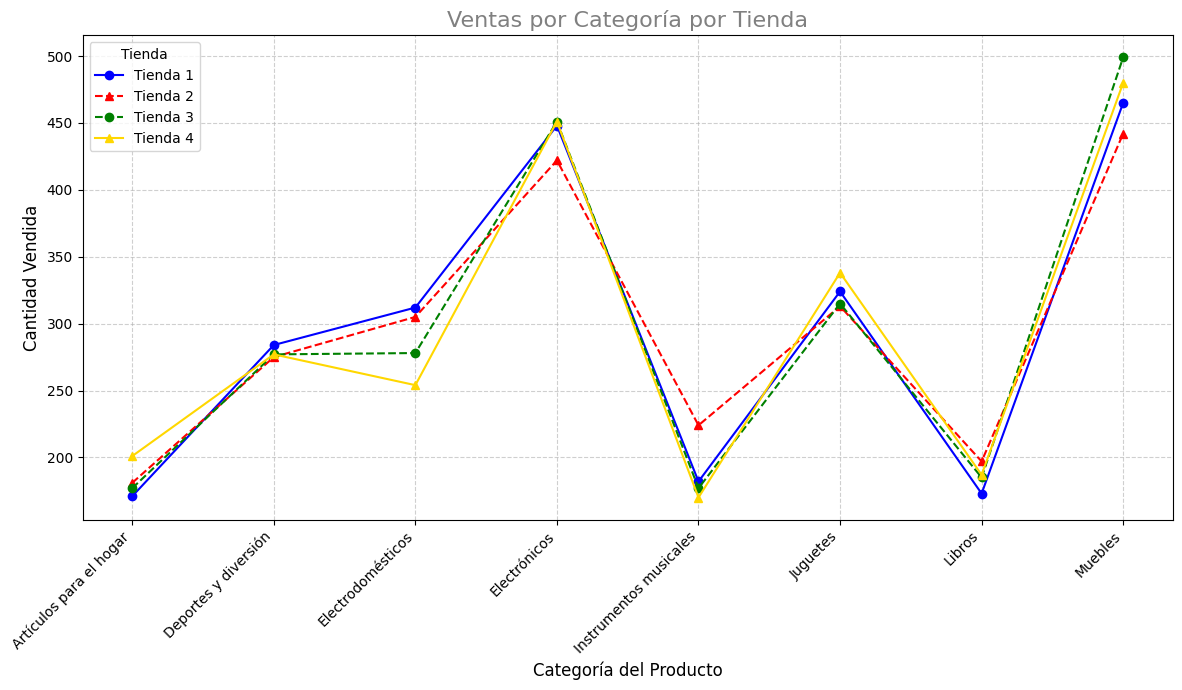

In [9]:
plt.figure(figsize=(12, 7))

plt.plot(ventas_categoria_tienda1['Categoría del Producto'],
         ventas_categoria_tienda1['Cantidad_Vendida'], marker='o',
         linestyle='-', color='blue', label='Tienda 1')
plt.plot(ventas_categoria_tienda2['Categoría del Producto'],
         ventas_categoria_tienda2['Cantidad_Vendida'], marker='^',
         linestyle='--', color='red', label='Tienda 2')
plt.plot(ventas_categoria_tienda3['Categoría del Producto'],
         ventas_categoria_tienda3['Cantidad_Vendida'], marker='o',
         linestyle='--', color='green', label='Tienda 3')
plt.plot(ventas_categoria_tienda4['Categoría del Producto'],
         ventas_categoria_tienda4['Cantidad_Vendida'], marker='^',
         linestyle='-', color='gold', label='Tienda 4')

plt.title('Ventas por Categoría por Tienda', fontsize=16, color='grey')
plt.xlabel('Categoría del Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x para mejor legibilidad
plt.legend(title='Tienda')
plt.grid(True, linestyle='--', alpha=0.6)#Añande cuadricula
plt.tight_layout() # Ajustar el layout
plt.show()

Para todas las tiendas la categoria de "Muebles" es la que más se vende sin excepiciones con 465, 442, 499, 480 de ventas respectivamente yendo de la tienda 1-4. (La categoria "Muebles" de la tienda 2 empata el numero de ventas de "422" con la categoria "Electronicos"). La categoria que menos se vende para todas las tiendas esta entre "Articulos para el hogar" y "Instrumentos musicales". Siendo más especificos en tienda 1 y 2 la categoria menos vendida es "Articulos para el hogar" con 171 y 181 ventas mientras que para la tienda 3 y 4 la categoria menos vendida son "Instrumentos musicales" con 177 y 170. (La categoria "intrumentos musicales de la tienda 3 empata el numero de ventas con la categoria "Articulos para el hogar")

# 3. Calificación promedio de la tienda


In [10]:
# prompt: calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

# Calculate the average customer rating for each store.
cal_prom_tienda1 = tienda1['Calificación'].mean()
cal_prom_tienda2 = tienda2['Calificación'].mean()
cal_prom_tienda3 = tienda3['Calificación'].mean()
cal_prom_tienda4 = tienda4['Calificación'].mean()

# Print the average rating for each store
print(f"\nCalificación promedio Tienda 1: {cal_prom_tienda1:.2f}")
print(f"Calificación promedio Tienda 2: {cal_prom_tienda2:.2f}")
print(f"Calificación promedio Tienda 3: {cal_prom_tienda3:.2f}")
print(f"Calificación promedio Tienda 4: {cal_prom_tienda4:.2f}")


Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


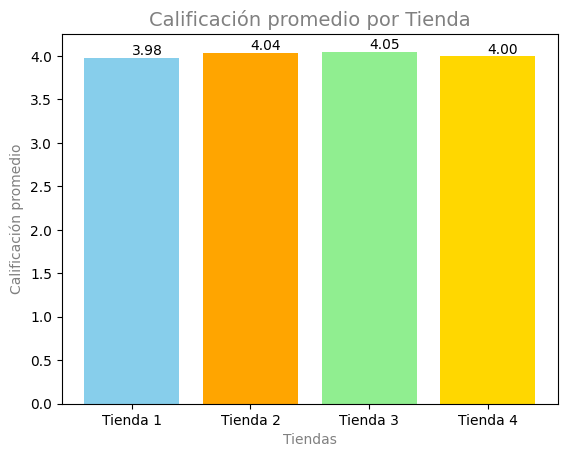

In [11]:
promedios_cal = [cal_prom_tienda1, cal_prom_tienda2, cal_prom_tienda3, cal_prom_tienda4]
plt.bar(tiendas, promedios_cal, color= colores)
plt.title('Calificación promedio por Tienda', fontsize=14, color='grey')
plt.xlabel('Tiendas', color='grey')
plt.ylabel('Calificación promedio', color='grey')

# Añadir etiquetas a los puntos de intersección
for i, txt in enumerate(promedios_cal):
    plt.text(tiendas[i], promedios_cal[i], f'{txt:.2f}', ha='left', va='bottom')
plt.show()

El promedio total para todas las tiendas no barea mucho siendo la más popular la tienda 3 con 4.05 de calificación promedio, rebazando por 0.07 decimas a la tienda 1 que fue la menos popular con 3.98 de calificación.

# 4. Productos más y menos vendidos

In [23]:
# prompt:  identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda sin usar matplotlib

# Identify the best and least selling products in each store
productos_vendidos_tienda1 = tienda1.groupby('Producto').size().reset_index(name='Cantidad_Vendida')
productos_vendidos_tienda2 = tienda2.groupby('Producto').size().reset_index(name='Cantidad_Vendida')
productos_vendidos_tienda3 = tienda3.groupby('Producto').size().reset_index(name='Cantidad_Vendida')
productos_vendidos_tienda4 = tienda4.groupby('Producto').size().reset_index(name='Cantidad_Vendida')

print("\nProductos más y menos vendidos - Tienda 1:")
print("Más vendidos:")
print(productos_vendidos_tienda1.nlargest(5, 'Cantidad_Vendida'))
print("\nMenos vendidos:")
print(productos_vendidos_tienda1.nsmallest(5, 'Cantidad_Vendida'))

print("\nProductos más y menos vendidos - Tienda 2:")
print("Más vendidos:")
print(productos_vendidos_tienda2.nlargest(5, 'Cantidad_Vendida'))
print("\nMenos vendidos:")
print(productos_vendidos_tienda2.nsmallest(5, 'Cantidad_Vendida'))

print("\nProductos más y menos vendidos - Tienda 3:")
print("Más vendidos:")
print(productos_vendidos_tienda3.nlargest(5, 'Cantidad_Vendida'))
print("\nMenos vendidos:")
print(productos_vendidos_tienda3.nsmallest(5, 'Cantidad_Vendida'))

print("\nProductos más y menos vendidos - Tienda 4:")
print("Más vendidos:")
print(productos_vendidos_tienda4.nlargest(5, 'Cantidad_Vendida'))
print("\nMenos vendidos:")
print(productos_vendidos_tienda4.nsmallest(5, 'Cantidad_Vendida'))


Productos más y menos vendidos - Tienda 1:
Más vendidos:
                   Producto  Cantidad_Vendida
1                   Armario                60
33               Microondas                60
48            TV LED UHD 4K                60
40         Secadora de ropa                58
9   Bloques de construcción                56

Menos vendidos:
                       Producto  Cantidad_Vendida
4     Auriculares con micrófono                33
13                 Celular ABXY                33
37              Olla de presión                35
38                    Pandereta                36
14  Ciencia de datos con Python                39

Productos más y menos vendidos - Tienda 2:
Más vendidos:
                     Producto  Cantidad_Vendida
24  Iniciando en programación                65
33                 Microondas                62
7                     Batería                61
21          Guitarra acústica                58
38                  Pandereta                58

Me

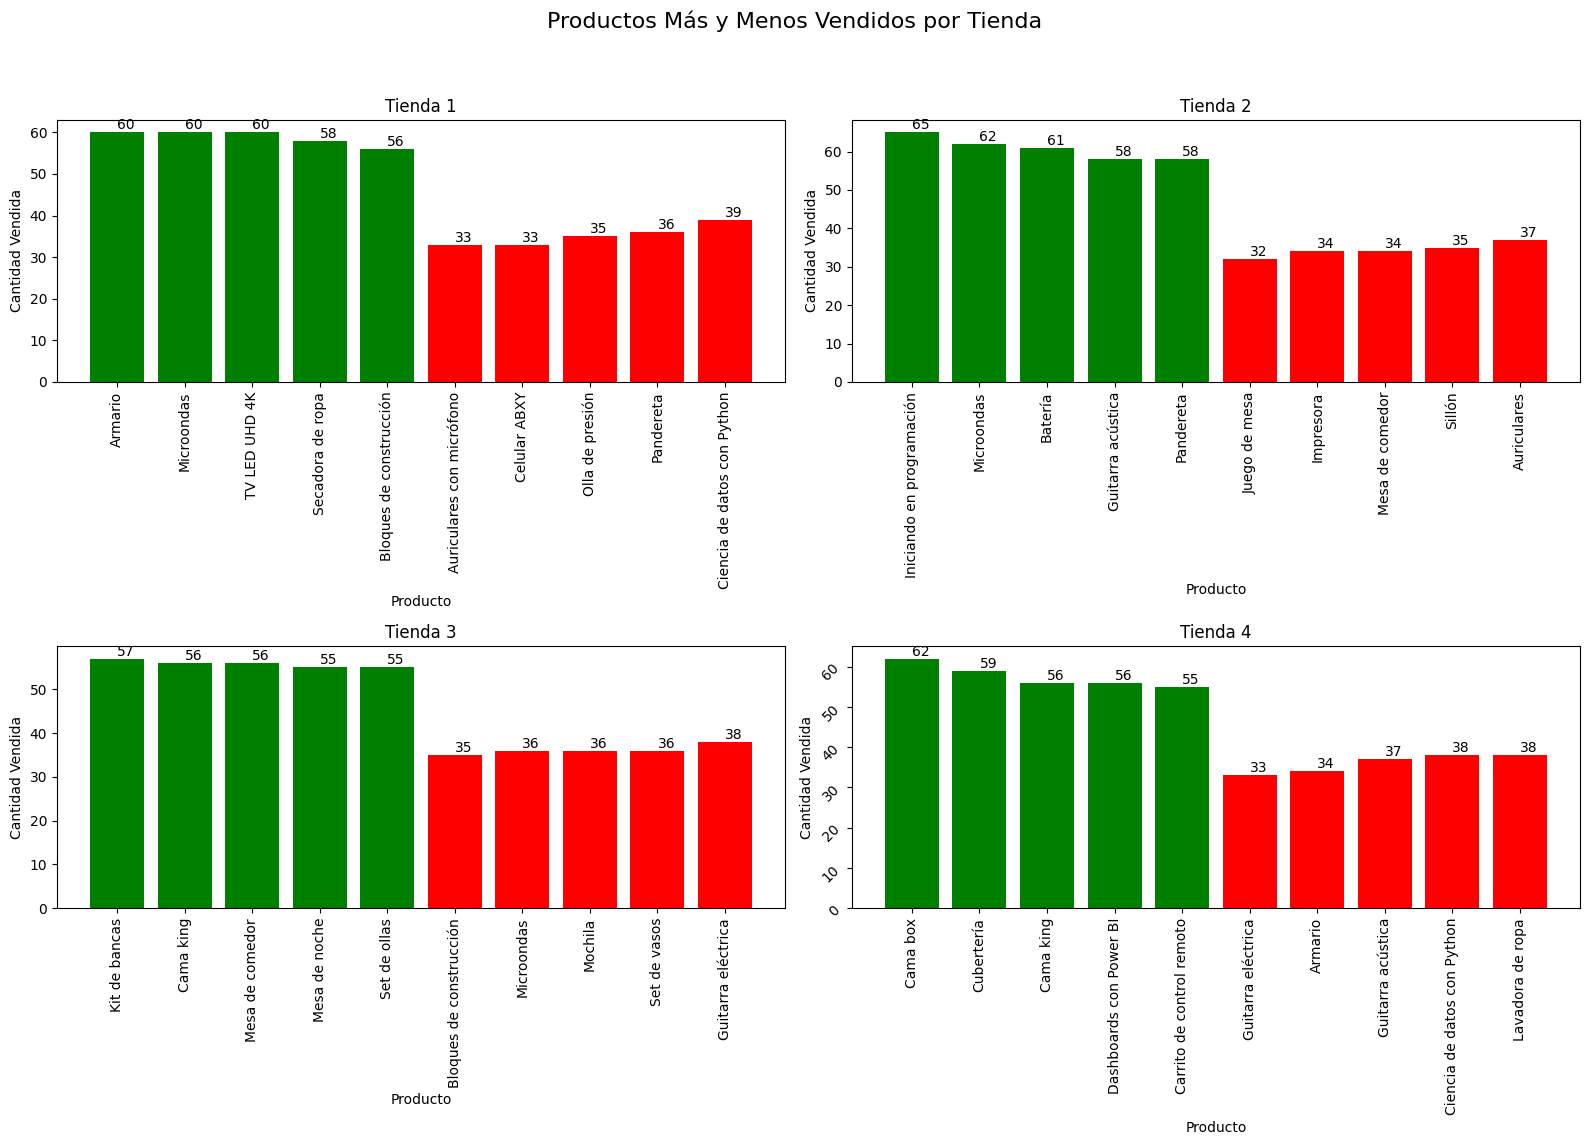

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Productos Más y Menos Vendidos por Tienda', fontsize=16)

# Grafico para Tienda 1
productos_mas_tienda1 = productos_vendidos_tienda1.nlargest(5, 'Cantidad_Vendida')
productos_menos_tienda1 = productos_vendidos_tienda1.nsmallest(5, 'Cantidad_Vendida')
eje_x_tienda1 = pd.concat([productos_mas_tienda1['Producto'],
                           productos_menos_tienda1['Producto']])
eje_y_tienda1 = pd.concat([productos_mas_tienda1['Cantidad_Vendida'],
                           productos_menos_tienda1['Cantidad_Vendida']])

axes[0, 0].bar(eje_x_tienda1, eje_y_tienda1, color=['green']*len(productos_mas_tienda1) +
                                            ['red']*len(productos_menos_tienda1))
axes[0, 0].set_title('Tienda 1')
axes[0, 0].set_xlabel('Producto')
axes[0, 0].set_ylabel('Cantidad Vendida')
axes[0, 0].tick_params(axis='x', rotation=90)

for i, txt in enumerate(eje_y_tienda1):
  axes[0, 0].text(eje_x_tienda1.iloc[i], txt, txt, ha='left', va='bottom')

# Grafico para Tienda 2
productos_mas_tienda2 = productos_vendidos_tienda2.nlargest(5, 'Cantidad_Vendida')
productos_menos_tienda2 = productos_vendidos_tienda2.nsmallest(5, 'Cantidad_Vendida')
eje_x_tienda2 = pd.concat([productos_mas_tienda2['Producto'],
                           productos_menos_tienda2['Producto']])
eje_y_tienda2 = pd.concat([productos_mas_tienda2['Cantidad_Vendida'],
                           productos_menos_tienda2['Cantidad_Vendida']])

axes[0, 1].bar(eje_x_tienda2, eje_y_tienda2,
               color=['green']*len(productos_mas_tienda2) +
                ['red']*len(productos_menos_tienda2))
axes[0, 1].set_title('Tienda 2')
axes[0, 1].set_xlabel('Producto')
axes[0, 1].set_ylabel('Cantidad Vendida')
axes[0, 1].tick_params(axis='x', rotation=90)

for i, txt in enumerate(eje_y_tienda2):
  axes[0, 1].text(eje_x_tienda2.iloc[i], txt, txt, ha='left', va='bottom')

# Grafico para Tienda 3
productos_mas_tienda3 = productos_vendidos_tienda3.nlargest(5, 'Cantidad_Vendida')
productos_menos_tienda3 = productos_vendidos_tienda3.nsmallest(5, 'Cantidad_Vendida')
eje_x_tienda3 = pd.concat([productos_mas_tienda3['Producto'], productos_menos_tienda3['Producto']])
eje_y_tienda3 = pd.concat([productos_mas_tienda3['Cantidad_Vendida'], productos_menos_tienda3['Cantidad_Vendida']])

axes[1, 0].bar(eje_x_tienda3, eje_y_tienda3,
               color=['green']*len(productos_mas_tienda3) + ['red']*len(productos_menos_tienda3))
axes[1, 0].set_title('Tienda 3')
axes[1, 0].set_xlabel('Producto')
axes[1, 0].set_ylabel('Cantidad Vendida')
axes[1, 0].tick_params(axis='x', rotation=90)

for i, txt in enumerate(eje_y_tienda3):
  axes[1, 0].text(eje_x_tienda3.iloc[i], txt, txt, ha='left', va='bottom')

# Grafico para Tienda 4
productos_mas_tienda4 = productos_vendidos_tienda4.nlargest(5, 'Cantidad_Vendida')
productos_menos_tienda4 = productos_vendidos_tienda4.nsmallest(5, 'Cantidad_Vendida')
eje_x_tienda4 = pd.concat([productos_mas_tienda4['Producto'], productos_menos_tienda4['Producto']])
eje_y_tienda4 = pd.concat([productos_mas_tienda4['Cantidad_Vendida'], productos_menos_tienda4['Cantidad_Vendida']])

axes[1, 1].bar(eje_x_tienda4, eje_y_tienda4,
               color=['green']*len(productos_mas_tienda4) + ['red']*len(productos_menos_tienda4))
axes[1, 1].set_title('Tienda 4')
axes[1, 1].set_xlabel('Producto')
axes[1, 1].set_ylabel('Cantidad Vendida')
axes[1, 1].tick_params(axis='x', rotation=90)
axes[1, 1].tick_params(axis='y', rotation=45)

for i, txt in enumerate(eje_y_tienda4):
  axes[1, 1].text(eje_x_tienda4.iloc[i], txt, txt, ha='left', va='bottom')


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar el layout para evitar solapamiento
plt.show()


Se percata de que la mayor canditad vendida es de 65 y la menor de 32 aunque no se replica en todas las tiendas. Esto solo sobre los 5 productos más y 5 menos vendidos. Existe un poco de coincidencia en ciertas tiendas y productos como por ejemplo en la tienda 1 y 2 el producto "microondas" las cuales tienen 60 y 62 respectivamente o de la tienda 3 y 4 en el producto "Cama king" con 56 y 56. Otra coincidencia es que en la tienda 3 el producto "Microondas" es el menos vendido con 36 o que la tienda 1 el producto "Armario" es el más vendido con ventas de 60 mientras que en la tienda 4 ese mismo producto es de los menos vendidos con 34. En conclusión: Estos gráficos sugieren que, si bien existe una demanda general por ciertos tipos de productos (electrónica/electrodomésticos), las preferencias de los consumidores y el rendimiento de productos específicos pueden variar significativamente entre las diferentes tiendas, las tiendas parecen tener diferentes fortalezas y debilidades en cuanto a los productos que mejor y peor se venden. Esto podría ser resultado de estrategias de marketing localizadas, diferencias en la base de clientes o incluso la ubicación física de las tiendas.


# 5. Envío promedio por tienda

In [29]:
# Promedio de los costos de envio por tienda.
promedio_costos_tienda1 = tienda1['Costo de envío'].mean()
promedio_costos_tienda2 = tienda2['Costo de envío'].mean()
promedio_costos_tienda3 = tienda3['Costo de envío'].mean()
promedio_costos_tienda4 = tienda4['Costo de envío'].mean()

print(f"\nCosto de envío promedio Tienda 1: {promedio_costos_tienda1:.2f}")
print(f"Costo de envío promedio Tienda 2: {promedio_costos_tienda2:.2f}")
print(f"Costo de envío promedio Tienda 3: {promedio_costos_tienda3:.2f}")
print(f"Costo de envío promedio Tienda 4: {promedio_costos_tienda4:.2f}")


Costo de envío promedio Tienda 1: 26018.61
Costo de envío promedio Tienda 2: 25216.24
Costo de envío promedio Tienda 3: 24805.68
Costo de envío promedio Tienda 4: 23459.46


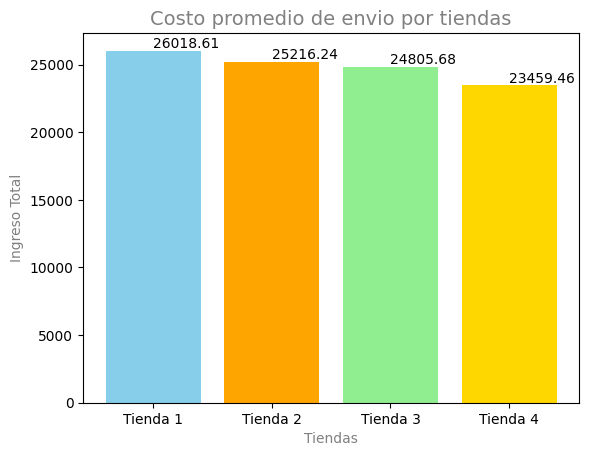

In [30]:
promedio_cos_tiendas = [promedio_costos_tienda1, promedio_costos_tienda2,
                        promedio_costos_tienda3, promedio_costos_tienda4]

plt.bar(tiendas, promedio_cos_tiendas, color= colores)
plt.title('Costo promedio de envio por tiendas', fontsize=14, color='grey')
plt.xlabel('Tiendas', color='grey')
plt.ylabel('Ingreso Total', color='grey')

# Etiquetas a los puntos de intersección
for i, txt in enumerate(promedio_cos_tiendas):
    plt.text(tiendas[i], promedio_cos_tiendas[i], f'{txt:.2f}', ha='left', va='bottom')
plt.show()

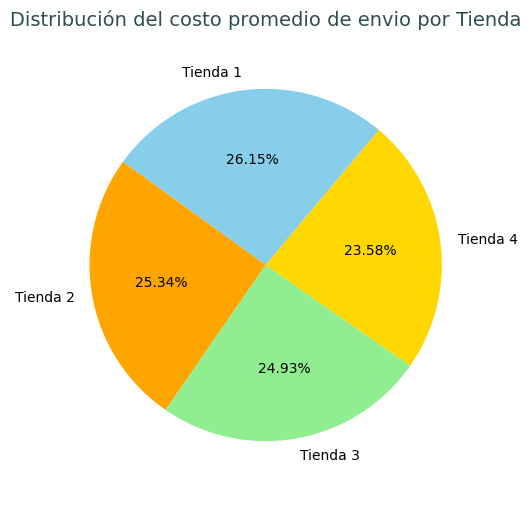

In [31]:
plt.figure(figsize=(5, 6)) # Ajusta el tamaño de la figura para mejor visualización
plt.pie(promedio_cos_tiendas, labels=tiendas, autopct='%1.2f%%',
        startangle=50, colors=colores)

plt.title('Distribución del costo promedio de envio por Tienda',
          fontsize=14, color='darkslategray')
plt.axis('equal')  # Asegura que el gráfico de pastel sea un círculo.
plt.show()

La tienda 1 tiene el costo de envío total más alto alcanzando 26,018.61 representando un 26.15% sobre el total, las tiendas 2 y 3 tienen costos de envío promedio bastante similares, alrededor de 25,216.24 y 24,805.68 con un 25.34% y 24.93% respectivamente. Finalemente la tienda 4 presenta el costo de envío total más bajo con aproximadamente 23,459.46 lo que vendría siendo un 23.58% y teniendo una variacion de 2,559.15 con la tienda 1.


# 6. Informe Final

Cada tienda tiene sus propias fortalezas y debilidades en cuanto a los productos y categorías más vendidas, esto puede deberse a la zona dónde se encuentra cada tienda, sin embargo, cada análisis hecho nos ayuda a identificar las áreas dónde podemos mejorar para intentar vender más productos dónde claramente otras tiendas son más productivas. Tomando en cuenta que la variación entre categorías y productos vendidos no se dispara tanto entre tiendas, la recomendación de vender una tienda se basara en los ingresos totales y costos promedio por envío. La tienda 4 sin duda es la que menos ingresos recibe sobre las demás teniendo una diferencia de 59,643,900 comparandola con la segunda tienda que menos ingresos tiene (Tienda 3), esto quiere decir que el capital de diferencia es cosiderablemente amplio, por otro lado la diferencia de promedios de costo por envio no vaira mucho; aunque la tienda 1 tenga más ventas, por consiguiente, más envíos y costo total de envíos, no se compara a la diferencia de ingresos. Teniendo todo lo anterior en cuenta cuenta sin duda la recomendación seria vender la tienda 4.